In [29]:
# Importing All the Libraries to be used

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


Reading the data

In [13]:
train = pd.read_csv('Data/train.csv')
test = pd.read_csv('Data/test.csv')
target = 'loan_status'

In [14]:
print(f'train shape: {train.shape}')
print(f'test shape :{test.shape}')

train shape: (58645, 13)
test shape :(39098, 12)


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

In [15]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39098 entries, 0 to 39097
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39098 non-null  int64  
 1   person_age                  39098 non-null  int64  
 2   person_income               39098 non-null  int64  
 3   person_home_ownership       39098 non-null  object 
 4   person_emp_length           39098 non-null  float64
 5   loan_intent                 39098 non-null  object 
 6   loan_grade                  39098 non-null  object 
 7   loan_amnt                   39098 non-null  int64  
 8   loan_int_rate               39098 non-null  float64
 9   loan_percent_income         39098 non-null  float64
 10  cb_person_default_on_file   39098 non-null  object 
 11  cb_person_cred_hist_length  39098 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.6+ MB


In [56]:
train.set_index('id',inplace=True)
test.set_index('id',inplace=True)

In [57]:
#Understanding the statistic of the data
train.describe().T

,count,mean,std,min,25%,50%,75%,max
person_age,58645.0,27.550857,6.033216,20.00,23.00,26.00,30.00,123.00
person_income,58645.0,64046.172871,37931.106978,4200.00,42000.00,58000.00,75600.00,1900000.00
person_emp_length,58645.0,4.701015,3.959784,0.00,2.00,4.00,7.00,123.00
loan_amnt,58645.0,9217.556518,5563.807384,500.00,5000.00,8000.00,12000.00,35000.00
loan_int_rate,58645.0,10.677874,3.034697,5.42,7.88,10.75,12.99,23.22
loan_percent_income,58645.0,0.159238,0.091692,0.00,0.09,0.14,0.21,0.83
cb_person_cred_hist_length,58645.0,5.813556,4.029196,2.00,3.00,4.00,8.00,30.00
loan_status,58645.0,0.142382,0.349445,0.00,0.00,0.00,0.00,1.00


In [58]:
Categorical_columns = train.select_dtypes(include='object').columns.to_list()
Numerical_columns = test.select_dtypes(exclude='object').columns.to_list()

In [59]:
#Checking values in Categorical column
train[Categorical_columns].nunique()

person_home_ownership        4
loan_intent                  6
loan_grade                   7
cb_person_default_on_file    2
dtype: int64

Exploring the data 

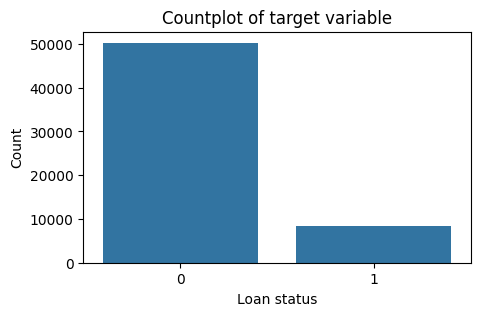

In [60]:
#exploring the target variable
plt.figure(figsize=(5,3))
sns.countplot(data=train, x=target)
plt.title("Countplot of target variable")
plt.xlabel("Loan status")
plt.ylabel("Count")
plt.show()

In [61]:
train[target].value_counts(normalize=True).round(4).multiply(100).astype('str') +' %'

loan_status
0    85.76 %
1    14.24 %
Name: proportion, dtype: object

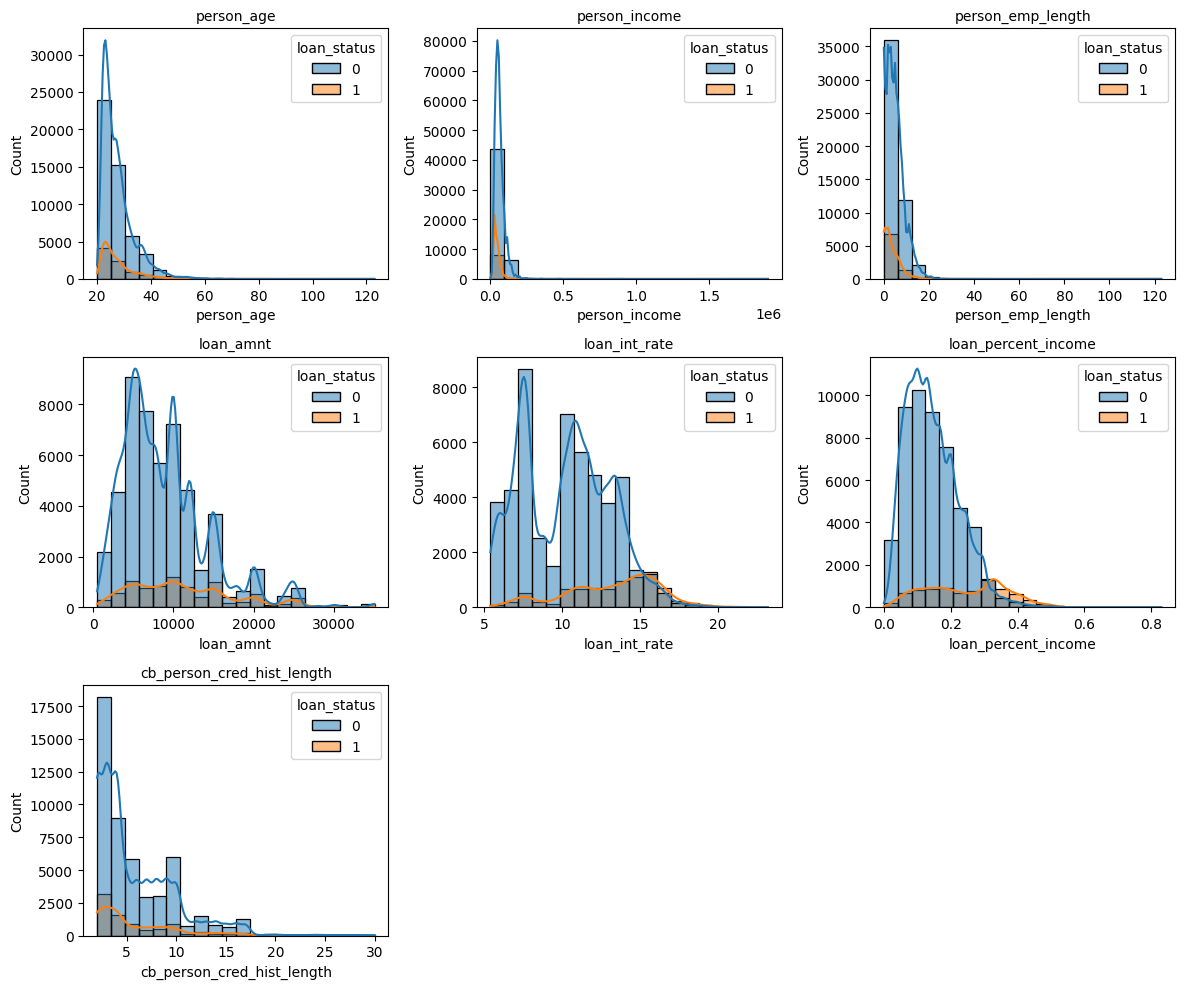

In [63]:
fig, axs = plt.subplots(3, 3, figsize=(12,10))

for feat, ax in zip(Numerical_columns, axs.ravel()):
    sns.histplot(x=feat, hue=train[target], data=train, kde=True, bins=20, ax=ax)
    ax.set_title(f"{feat}", fontsize=10)

# Remove the last two unused subplots
for i in range(7, 9):
    fig.delaxes(axs.ravel()[i])

plt.tight_layout()
plt.show()

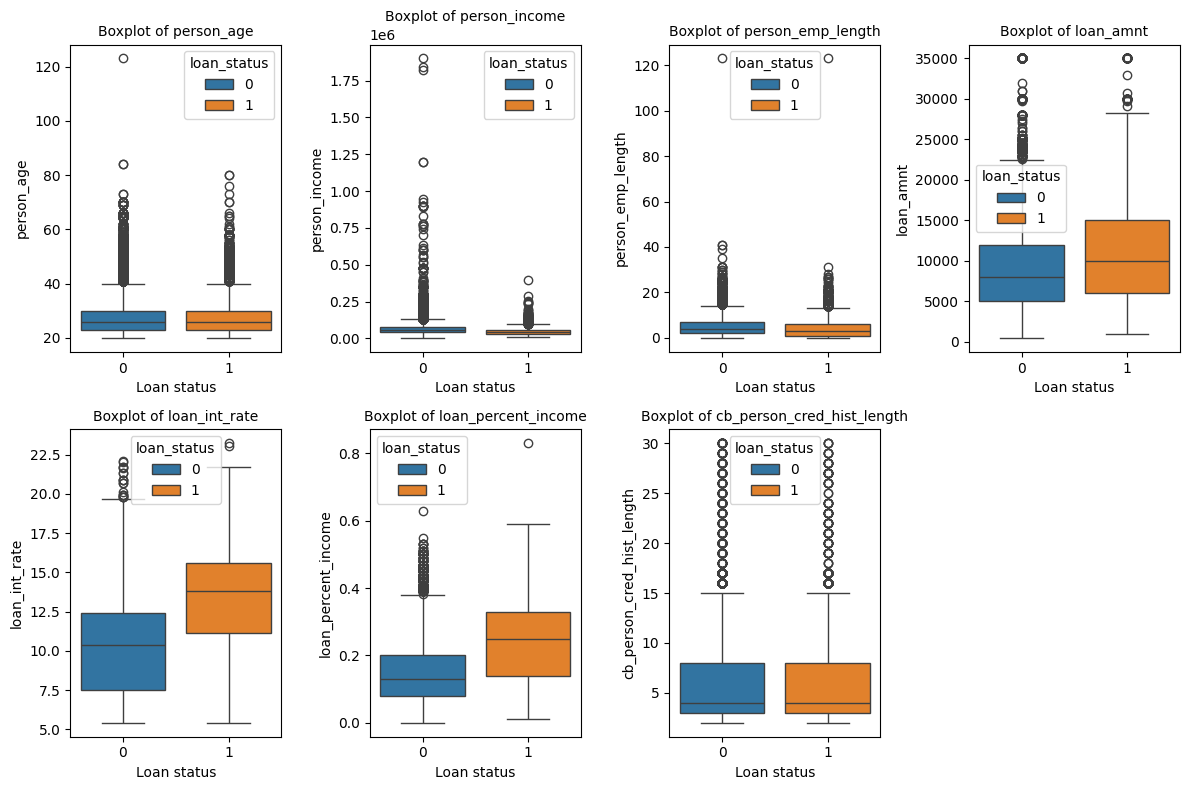

In [67]:
fig, axs = plt.subplots(2,4, figsize=(12, 8))

for feat, ax in zip(Numerical_columns, axs.ravel()):
    sns.boxplot(x=train[target], y=feat, data=train, ax=ax,hue=train[target])
    ax.set_title(f"Boxplot of {feat}", size=10)
    ax.set_xlabel("Loan status")


fig.delaxes(axs.ravel()[7])
plt.tight_layout()
plt.show()